In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']

In [2]:
with open("./log.txt", "r") as f:
    lines = [line.rstrip() for line in f.readlines()][::3][1:]
    cond_ents, elbos, accs = [], [], []
    for l in lines:
        a, b, c = l.split(" ")
        cond_ents.append(float(a))
        elbos.append(float(b))
        accs.append(float(c))

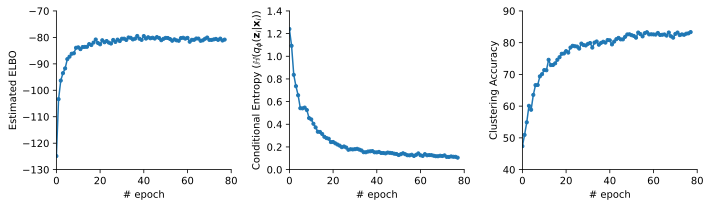

In [3]:
fig = plt.figure(figsize=(10, 3))

fig.add_subplot(131)
plt.plot(elbos)
plt.scatter(range(len(elbos)), elbos, s=10)
plt.xlabel("# epoch")
plt.xlim(0, 80)
plt.ylabel("Estimated ELBO")
plt.ylim(-130, -70)
plt.gca().spines.right.set_visible(False)
plt.gca().spines.top.set_visible(False)

fig.add_subplot(132)
plt.plot(cond_ents)
plt.scatter(range(len(cond_ents)), cond_ents, s=10)
plt.xlabel("# epoch")
plt.xlim(0, 80)
plt.ylabel("Conditional Entropy (" + r"$\mathbb{H}(q_{\phi} (\mathbf{z}_i \vert \mathbf{x}_i)$" + ")")
plt.ylim(0, 1.4)
plt.gca().spines.right.set_visible(False)
plt.gca().spines.top.set_visible(False)

fig.add_subplot(133)
plt.plot(np.array(accs) * 100)
plt.scatter(range(len(accs)), np.array(accs) * 100, s=10)
plt.xlabel("# epoch")
plt.xlim(0, 80)
plt.ylabel("Clustering Accuracy")
plt.ylim(40, 90)
plt.gca().spines.right.set_visible(False)
plt.gca().spines.top.set_visible(False)

plt.tight_layout()
plt.savefig("learning_curves.pdf", bbox_inches='tight', pad_inches = 0)